## 数据分析

### 数据清洗

In [99]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sbn

In [4]:
import pandas as pd

In [5]:
# 指定要导入的XLSX文件的文件路径
file_path = '商品销售数据.xlsx'
# 使用pandas的read_excel函数读取XLSX文件
data = pd.read_excel(file_path)

In [6]:
#数据清洗

In [7]:
#查看是否有空值 异常值  用箱线图来判断是否异常值  由图可观察到无异常值

In [14]:
data.isnull()

,商品代号,销售月份,销售点类型,销售额（万元）
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1321,False,False,False,False
1322,False,False,False,False
1323,False,False,False,False
1324,False,False,False,False


In [17]:
data.isnull().any(axis=1) #查找每一行的空值

0       False
1       False
2       False
3       False
4       False
        ...  
1321    False
1322    False
1323    False
1324    False
1325    False
Length: 1326, dtype: bool

In [18]:
data.isnull().sum() #查找每一列的空值 

商品代号       0
销售月份       0
销售点类型      0
销售额（万元）    0
dtype: int64

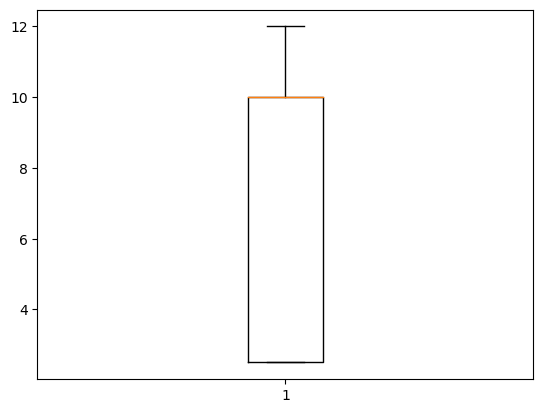

In [9]:
#绘制箱线图
plt.boxplot(data['销售额（万元）'])
plt.show()

### 数据可视化

In [106]:
#查看总销售额对比

In [107]:
# 使用groupby()和sum()函数计算总销售额
total_sales = data.groupby('销售点类型')['销售额（万元）'].sum()

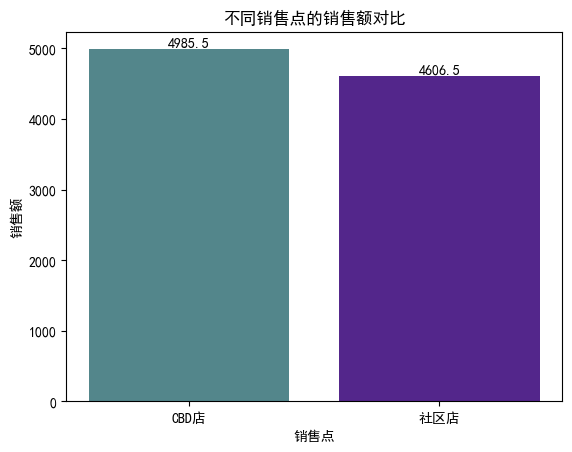

In [108]:
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体（黑体）
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

#画图
p5=plt.bar(total_sales.index, total_sales.values,color=['#53868B','#53268B'])
plt.title('不同销售点的销售额对比')
plt.xlabel('销售点')
plt.ylabel('销售额')
# 添加数据标签
#for x, y in zip(total_sales.index, total_sales.values):
#   plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.bar_label(p5,label_type='edge') #添加数据标签
# 显示柱形图
plt.show()

In [109]:
#CBD店和社区店不同月份销售额对比
num = pd.pivot_table(data, index='销售点类型', columns='销售月份', values='销售额（万元）',aggfunc=sum) 

In [110]:
month_sort=['January','February','March','April','May','June','July','August','September','October','November','December']
#定义索引顺序
num=num[month_sort]

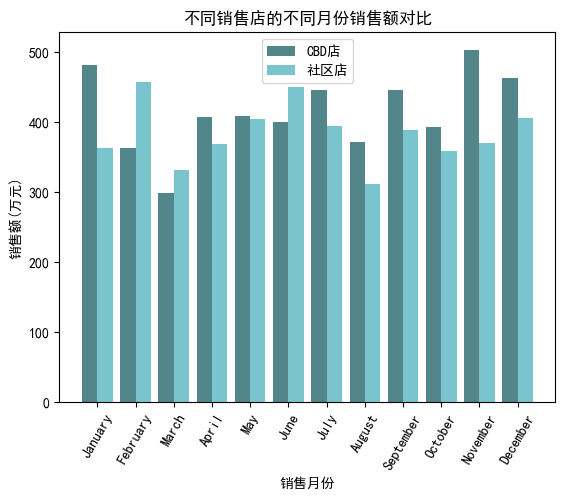

In [111]:
bar_width = 0.4
color = ['#53868B','#7AC5CD']
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei'] 
#编写两个柱状图的代码   enumerate是给数值填上索引顺序
for j,i in enumerate(num.index) :
    plt.bar(np.arange(12)+bar_width*j, num.loc[i,:], bar_width, label=i, color=color[j])     
    
plt.xticks(np.arange(12)+0.2, num.columns, rotation=60)  #修改x轴标签 以及替换索引名称,改变x轴标签位置
plt.xlabel('销售月份')
plt.ylabel('销售额(万元)')
plt.title('不同销售店的不同月份销售额对比')
plt.legend()
plt.show()

In [112]:
ind = ['mean','std','min','max']
num1=num.T.describe().loc[ind, :].T
num1

,mean,std,min,max
销售点类型,,,,
CBD店,415.458333,56.648621,299.0,503.5
社区店,383.875000,42.818393,311.5,457.0


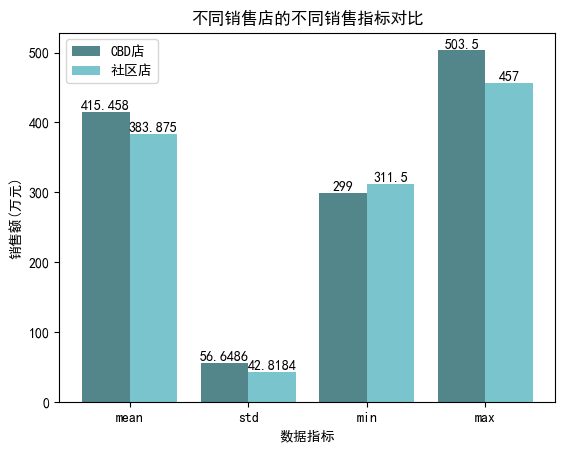

In [113]:
bar_width = 0.4
color = ['#53868B','#7AC5CD']
#编写两个柱状图的代码   enumerate是给数值填上索引顺序
for j,i in enumerate(num1.index) :
    p1 = plt.bar(np.arange(4)+bar_width*j, num1.loc[i,:], bar_width, label=i, color=color[j])     
    
    plt.xticks(np.arange(4)+0.2, num1.columns)  #修改x轴标签 以及替换索引名称
    plt.bar_label(p1,label_type='edge')
plt.xlabel('数据指标')
plt.ylabel('销售额(万元)')
plt.title('不同销售店的不同销售指标对比')
plt.legend()
plt.show()

In [114]:
#季节

In [115]:
#定义季节索引顺序 字典来存储数据
month_to_season={'January':1,'February' :1,'March' :1,'April' :2,'May' :2,'June' :2,'July' :3,'August' :3,'September' :3,'October' :4,'November':4,'December':4}
#定义索引顺序
data['季节'] = data['销售月份'].map(month_to_season)
data.head()

,商品代号,销售月份,销售点类型,销售额（万元）,季节
0,Tape 10,April,CBD店,2.5,2
1,Safety 8,August,社区店,10.0,3
2,Safety 2,February,社区店,10.0,1
3,Safety 8,November,社区店,10.0,4
4,Tape 10,October,社区店,2.5,4


In [116]:
#CBD店和社区店不同季节销售额对比
num6 = pd.pivot_table(data, index='销售点类型', columns='季节', values='销售额（万元）',aggfunc=sum) 
print(num6)

季节          1       2       3       4
销售点类型                                
CBD店   1144.0  1216.0  1265.0  1360.5
社区店    1152.0  1224.0  1095.5  1135.0


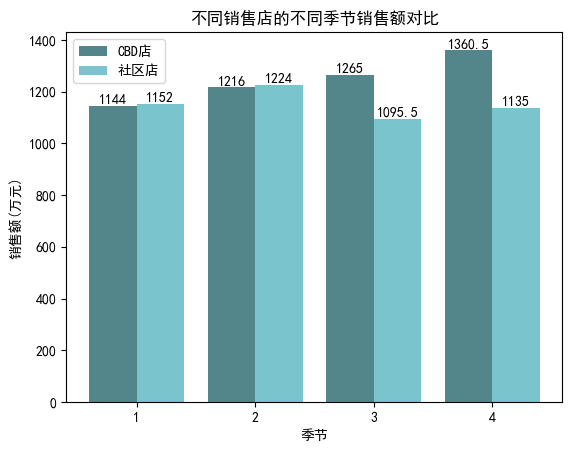

In [117]:
bar_width = 0.4
color = ['#53868B','#7AC5CD']
#编写两个柱状图的代码   enumerate是给数值填上索引顺序
for j,i in enumerate(num6.index) :
    p2=plt.bar(np.arange(4)+bar_width*j, num6.loc[i,:], bar_width, label=i, color=color[j])   
    plt.bar_label(p2,label_type='edge')    #添加数据标签
plt.xticks(np.arange(4)+0.2, num6.columns)  #修改x轴标签 以及替换索引名称
plt.xlabel('季节')
plt.ylabel('销售额(万元)')
plt.title('不同销售店的不同季节销售额对比')
plt.legend()
plt.show()

In [118]:
#划分 以销售月份来分析销售点类型的销售额

In [119]:
num2=num.T

In [120]:
print(num2)

销售点类型       CBD店    社区店
销售月份                   
January    482.0  363.0
February   363.0  457.0
March      299.0  332.0
April      407.0  369.5
May        408.5  404.5
June       400.5  450.0
July       446.0  395.0
August     372.5  311.5
September  446.5  389.0
October    394.0  359.0
November   503.5  370.0
December   463.0  406.0


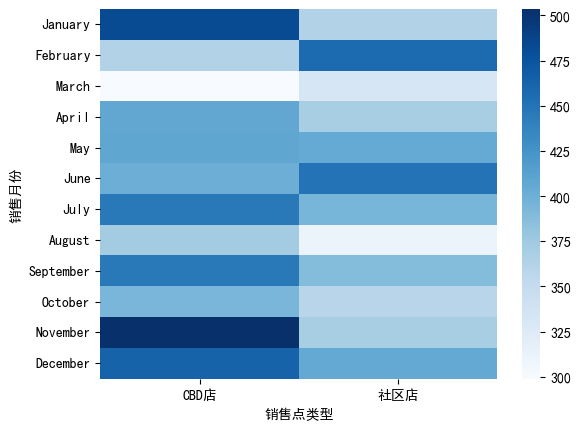

In [121]:
#热力图  根据热力图来安排员工培训计划
import seaborn as sbn
sbn.heatmap(num2,cmap='Blues') #数值 和 颜色
plt.show()

In [122]:
data.head()

,商品代号,销售月份,销售点类型,销售额（万元）,季节
0,Tape 10,April,CBD店,2.5,2
1,Safety 8,August,社区店,10.0,3
2,Safety 2,February,社区店,10.0,1
3,Safety 8,November,社区店,10.0,4
4,Tape 10,October,社区店,2.5,4


In [123]:
#不同月份的商品销售额对比

In [124]:
#不同商品不同月份销售额对比
num7 = pd.pivot_table(data, index='商品代号', columns='销售月份', values='销售额（万元）',aggfunc=sum).fillna(0)

In [125]:
num7=num7[month_sort]

In [126]:
print(num7)

销售月份         January  February  March  April    May   June   July  August  \
商品代号                                                                        
Adhesive 1       0.0       0.0    0.0    0.0    0.0    0.0    0.0     0.0   
Adhesive 10      7.0      14.0    0.0    7.0    0.0    0.0    0.0     7.0   
Adhesive 2       7.0       7.0    0.0    0.0   14.0    0.0    7.0     7.0   
Adhesive 3       0.0       7.0    7.0    0.0    7.0    0.0   14.0     7.0   
Adhesive 4      21.0      28.0   35.0   14.0   21.0   35.0   21.0    28.0   
Adhesive 5      21.0      14.0   21.0   35.0   14.0   14.0   28.0     0.0   
Adhesive 6       0.0       7.0    0.0    0.0    0.0    7.0    7.0     0.0   
Adhesive 7       0.0       7.0    7.0    7.0    0.0   14.0   14.0     7.0   
Adhesive 8       0.0       0.0   14.0    0.0    0.0    7.0    7.0     0.0   
Adhesive 9       0.0       0.0   21.0    0.0    7.0   14.0    0.0     7.0   
Safety 1        48.0      72.0   60.0   48.0   24.0  108.0   12.0    36.0   

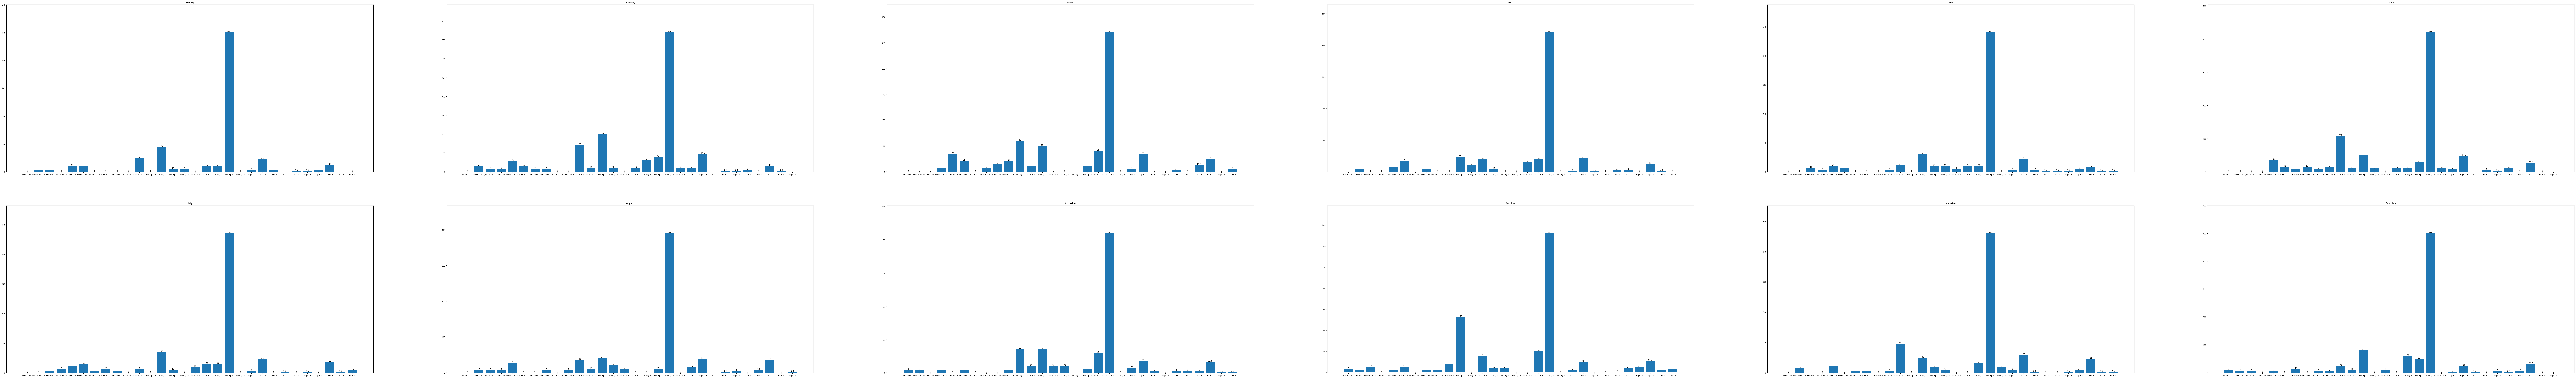

In [127]:
plt.figure(figsize=(210,80)) #定义画布大小
for j,i in enumerate(num7.columns):  # for循环绘制30个商品折线图，遍历函数取索引值和具体的值
    plt.subplot(5,6,j+1) #画布的数量 
    p4=plt.bar(num7.index,num7.loc[:,i]) #绘制折线图
    plt.ylim(-1,np.max(num7.loc[:,i]*1.2)) #y轴刻度
    plt.bar_label(p4,label_type='edge') 
    plt.title(i) #标签
plt.show()

In [128]:
#划分商品大类 字典存储数据

In [129]:
product_all = {
    'Adhesive 1': 'Adhesive',
    'Adhesive 2': 'Adhesive',
    'Adhesive 3': 'Adhesive',
    'Adhesive 4': 'Adhesive',
    'Adhesive 5': 'Adhesive',
    'Adhesive 6': 'Adhesive',
    'Adhesive 7': 'Adhesive',
    'Adhesive 8': 'Adhesive',
    'Adhesive 9': 'Adhesive',
    'Adhesive 10': 'Adhesive',
    
    'Tape 1': 'Tape',
    'Tape 2': 'Tape',
    'Tape 3': 'Tape',
    'Tape 4': 'Tape',
    'Tape 5': 'Tape',
    'Tape 6': 'Tape',
    'Tape 7': 'Tape',
    'Tape 8': 'Tape',
    'Tape 9': 'Tape',
    'Tape 10': 'Tape',

    'Safety 1': 'Safety',
    'Safety 2': 'Safety',
    'Safety 3': 'Safety',
    'Safety 4': 'Safety',
    'Safety 5': 'Safety',
    'Safety 6': 'Safety',
    'Safety 7': 'Safety',
    'Safety 8': 'Safety',
    'Safety 9': 'Safety',
    'Safety 10': 'Safety',
}

In [130]:
data

,商品代号,销售月份,销售点类型,销售额（万元）,季节
0,Tape 10,April,CBD店,2.5,2
1,Safety 8,August,社区店,10.0,3
2,Safety 2,February,社区店,10.0,1
3,Safety 8,November,社区店,10.0,4
4,Tape 10,October,社区店,2.5,4
...,...,...,...,...,...
1321,Tape 10,November,社区店,2.5,4
1322,Safety 1,October,CBD店,12.0,4
1323,Safety 8,October,CBD店,10.0,4
1324,Tape 6,October,社区店,2.5,4


In [131]:
data['商品大类'] = data['商品代号'].map(product_all)
data

,商品代号,销售月份,销售点类型,销售额（万元）,季节,商品大类
0,Tape 10,April,CBD店,2.5,2,Tape
1,Safety 8,August,社区店,10.0,3,Safety
2,Safety 2,February,社区店,10.0,1,Safety
3,Safety 8,November,社区店,10.0,4,Safety
4,Tape 10,October,社区店,2.5,4,Tape
...,...,...,...,...,...,...
1321,Tape 10,November,社区店,2.5,4,Tape
1322,Safety 1,October,CBD店,12.0,4,Safety
1323,Safety 8,October,CBD店,10.0,4,Safety
1324,Tape 6,October,社区店,2.5,4,Tape


In [132]:
## 使用groupby()和sum()函数计算各大类商品总销售额
#CBD店和社区店不同月份销售额对比
product_all_sales = pd.pivot_table(data, index='商品大类', columns='销售月份', values='销售额（万元）',aggfunc=sum) 

In [133]:
print(product_all_sales)

销售月份      April  August  December  February  January   July   June  March  \
商品大类                                                                        
Adhesive   63.0    63.0      57.0      84.0     56.0   98.0   91.0  105.0   
Safety    628.0   516.0     734.0     652.0    698.0  642.0  658.0  440.0   
Tape       85.5   105.0      78.0      84.0     91.0  101.0  101.5   86.0   

销售月份        May  November  October  September  
商品大类                                           
Adhesive   63.0      56.0     85.0       36.0  
Safety    654.0     686.0    572.0      692.0  
Tape       96.0     131.5     96.0      107.5  


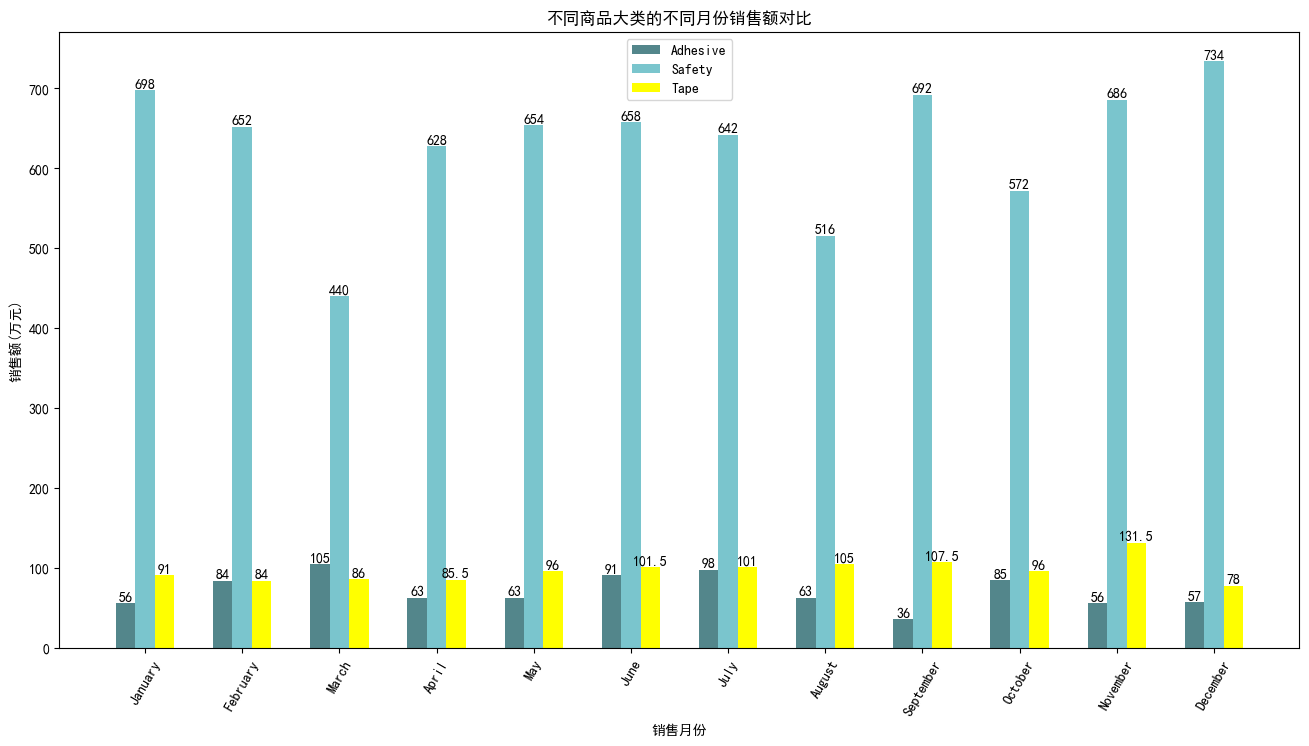

In [134]:
product_all_sales=product_all_sales[month_sort]
bar_width = 0.2
color = ['#53868B','#7AC5CD','yellow']
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.figure(figsize=(16, 8)) #设置画布大小
#编写两个柱状图的代码   enumerate是给数值填上索引顺序
for j,i in enumerate(product_all_sales.index) :
    p3=plt.bar(np.arange(12)+bar_width*j, product_all_sales.loc[i,:], bar_width, label=i, color=color[j])     
    plt.bar_label(p3,label_type='edge')    #添加数据标签
plt.xticks(np.arange(12)+0.2, product_all_sales.columns, rotation=60)  #修改x轴标签 以及替换索引名称,改变x轴标签位置
plt.xlabel('销售月份')
plt.ylabel('销售额(万元)')
plt.title('不同商品大类的不同月份销售额对比')
plt.legend()
plt.show()

In [135]:
#不同商品大类在不同季节的销售额

In [136]:
product_all_season=pd.pivot_table(data, index='商品大类', columns='季节', values='销售额（万元）',aggfunc=sum).fillna(0)

In [137]:
product_all_season

季节,1,2,3,4
商品大类,,,,
Adhesive,245.0,217.0,197.0,198.0
Safety,1790.0,1940.0,1850.0,1992.0
Tape,261.0,283.0,313.5,305.5


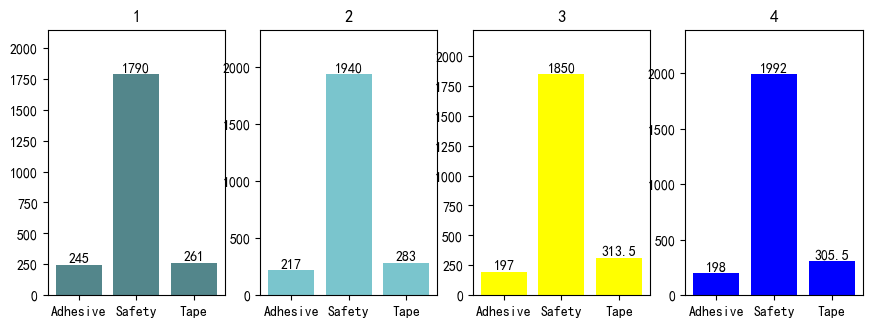

In [138]:
color = ['#53868B','#7AC5CD','yellow','blue']
plt.figure(figsize=(16,20)) #定义画布大小
for j,i in enumerate(product_all_season.columns):  # for循环绘制3个商品大类折线图，遍历函数取索引值和具体的值
    plt.subplot(5,6,j+1) #画布的数量 
    p7=plt.bar(product_all_season.index,product_all_season.loc[:,i],color=color[j]) #绘制折线图
    plt.ylim(-1,np.max(product_all_season.loc[:,i]*1.2)) #y轴刻度
    plt.bar_label(p7,label_type='edge')    #添加数据标签
    plt.title(i) #标签
    
plt.show()

In [139]:
#根据来看不同商品在各个季节的销售额

In [140]:
#商品不同季节销售额对比
num3 = pd.pivot_table(data, index='商品代号', columns='季节', values='销售额（万元）',aggfunc=sum).fillna(0) 

In [141]:
num3=num3.T
print(num3)

商品代号  Adhesive 1  Adhesive 10  Adhesive 2  Adhesive 3  Adhesive 4  Adhesive 5  \
季节                                                                              
1            0.0         21.0        14.0        14.0        84.0        56.0   
2            0.0          7.0        14.0         7.0        70.0        63.0   
3            8.0         14.0        14.0        28.0        49.0        35.0   
4           16.0         28.0        21.0         0.0        35.0        14.0   

商品代号  Adhesive 6  Adhesive 7  Adhesive 8  Adhesive 9  ...  Tape 1  Tape 10  \
季节                                                    ...                    
1            7.0        14.0        14.0        21.0  ...    21.0    127.5   
2            7.0        21.0         7.0        21.0  ...    18.0    135.0   
3            7.0        21.0         7.0        14.0  ...    36.0    117.5   
4           21.0        14.0        14.0        35.0  ...    18.0    110.0   

商品代号  Tape 2  Tape 3  Tape 4  Tape 5  Tape 6

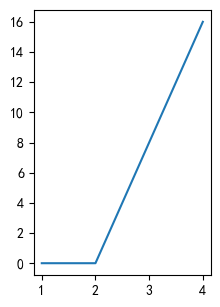

In [142]:
#画一个图
plt.figure(figsize=(16,20)) #定义画布大小
plt.subplot(5,6,1) #画布的数量 
plt.plot(num3.index,num3.loc[:,'Adhesive 1']) #绘制折线图
plt.show()

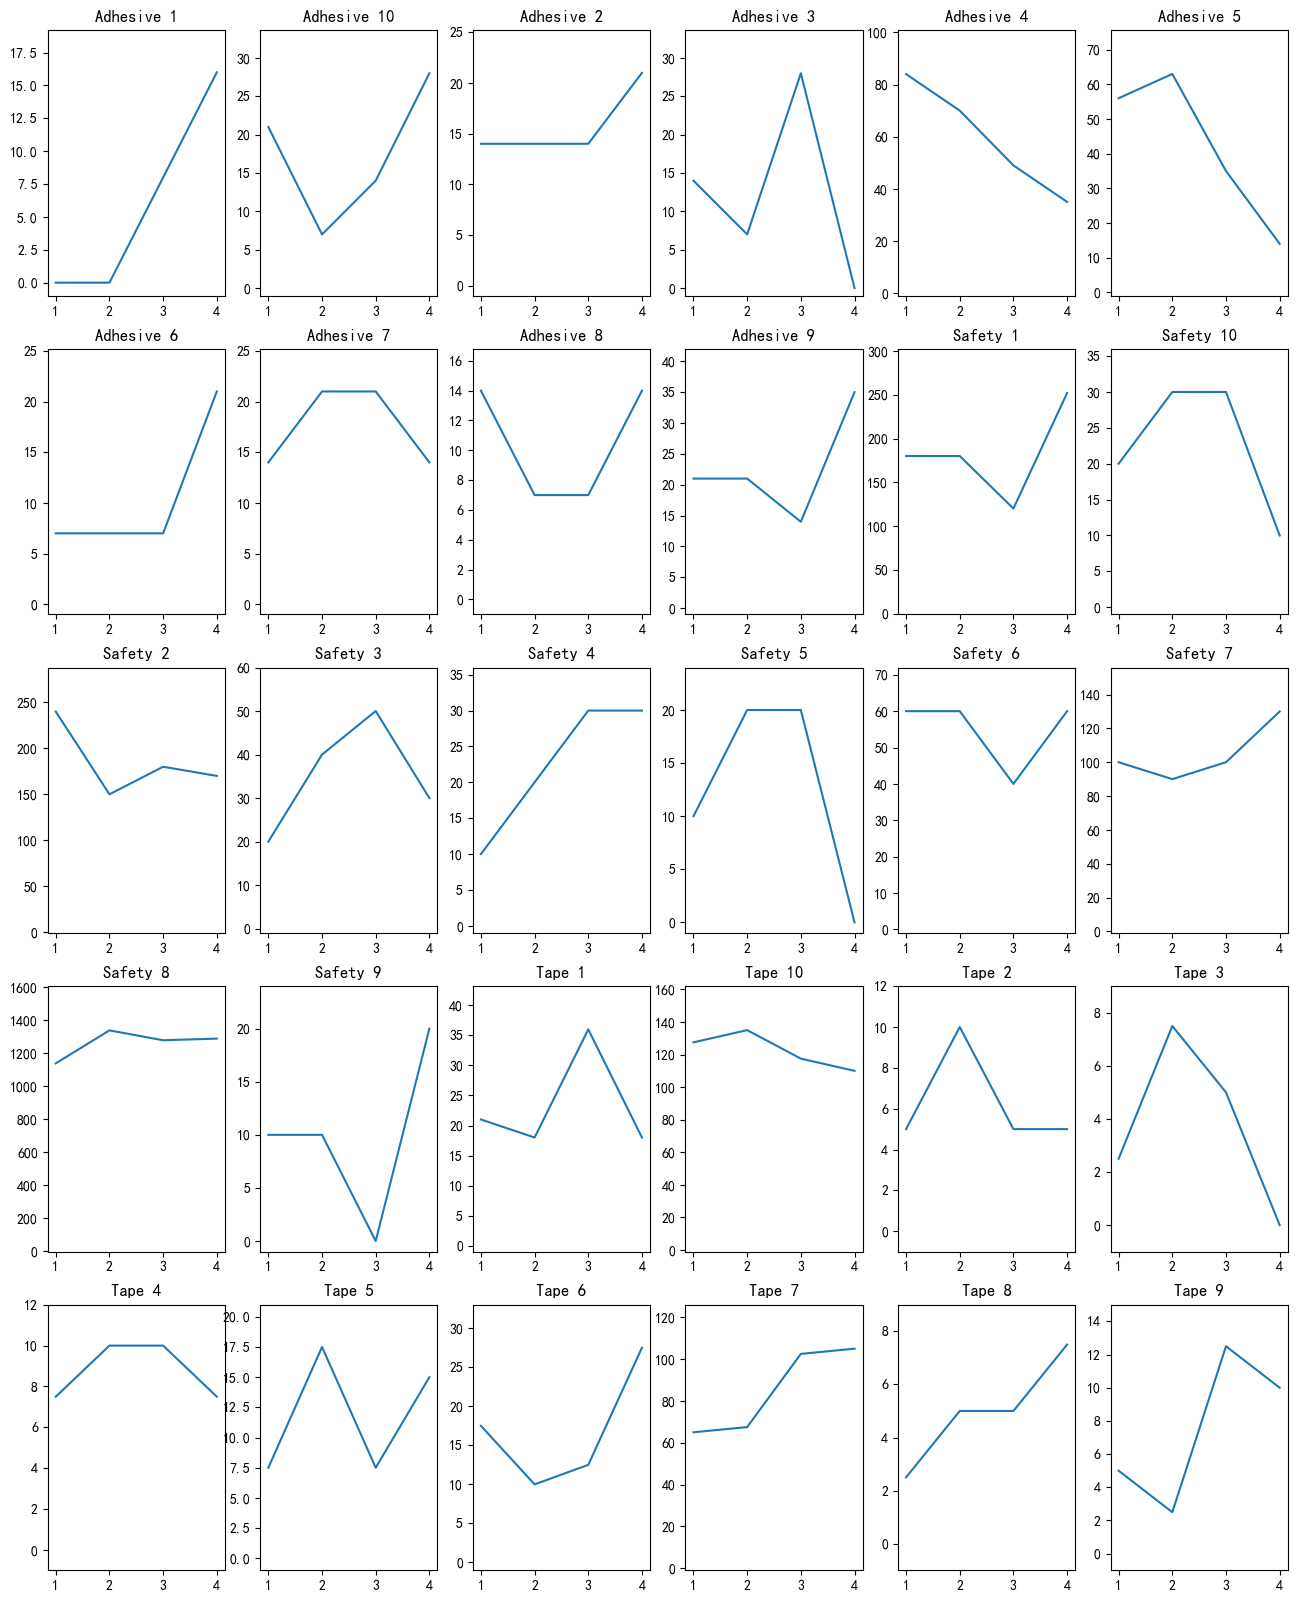

In [143]:
plt.figure(figsize=(16,20)) #定义画布大小
for j,i in enumerate(num3.columns):  # for循环绘制30个商品折线图，遍历函数取索引值和具体的值
    plt.subplot(5,6,j+1) #画布的数量 
    plt.plot(num3.index,num3.loc[:,i]) #绘制折线图
    plt.ylim(-1,np.max(num3.loc[:,i]*1.2)) #y轴刻度
    plt.title(i) #标签
plt.show()

In [144]:
# 转置
num4=num3.T
print(num4)

季节                1       2       3       4
商品代号                                       
Adhesive 1      0.0     0.0     8.0    16.0
Adhesive 10    21.0     7.0    14.0    28.0
Adhesive 2     14.0    14.0    14.0    21.0
Adhesive 3     14.0     7.0    28.0     0.0
Adhesive 4     84.0    70.0    49.0    35.0
Adhesive 5     56.0    63.0    35.0    14.0
Adhesive 6      7.0     7.0     7.0    21.0
Adhesive 7     14.0    21.0    21.0    14.0
Adhesive 8     14.0     7.0     7.0    14.0
Adhesive 9     21.0    21.0    14.0    35.0
Safety 1      180.0   180.0   120.0   252.0
Safety 10      20.0    30.0    30.0    10.0
Safety 2      240.0   150.0   180.0   170.0
Safety 3       20.0    40.0    50.0    30.0
Safety 4       10.0    20.0    30.0    30.0
Safety 5       10.0    20.0    20.0     0.0
Safety 6       60.0    60.0    40.0    60.0
Safety 7      100.0    90.0   100.0   130.0
Safety 8     1140.0  1340.0  1280.0  1290.0
Safety 9       10.0    10.0     0.0    20.0
Tape 1         21.0    18.0    3

In [145]:
num4[1].sort_values().index[:5]  #滞销前五 第一季度的值

Index(['Adhesive 1', 'Tape 3', 'Tape 8', 'Tape 2', 'Tape 9'], dtype='object', name='商品代号')

In [146]:
num4[1].sort_values().index[-5:] #畅销前五

Index(['Safety 7', 'Tape 10', 'Safety 1', 'Safety 2', 'Safety 8'], dtype='object', name='商品代号')

In [147]:
num5=pd.DataFrame([],index=num4.columns,columns=['滞销商品','畅销商品'])

In [148]:
for i in num4.columns:
    num5.loc[i,'滞销商品'] = list(num4[1].sort_values().index[:5])
    num5.loc[i,'畅销商品'] = list(num4[1].sort_values().index[-5:])
print(num5)


                                            滞销商品  \
季节                                                 
1   [Adhesive 1, Tape 3, Tape 8, Tape 2, Tape 9]   
2   [Adhesive 1, Tape 3, Tape 8, Tape 2, Tape 9]   
3   [Adhesive 1, Tape 3, Tape 8, Tape 2, Tape 9]   
4   [Adhesive 1, Tape 3, Tape 8, Tape 2, Tape 9]   

                                                 畅销商品  
季节                                                     
1   [Safety 7, Tape 10, Safety 1, Safety 2, Safety 8]  
2   [Safety 7, Tape 10, Safety 1, Safety 2, Safety 8]  
3   [Safety 7, Tape 10, Safety 1, Safety 2, Safety 8]  
4   [Safety 7, Tape 10, Safety 1, Safety 2, Safety 8]  


In [149]:
#文件保存
num5.to_csv('E:\\IT\\大四\\python数据分析\\tipdm\\商品滞销畅销名称.csv',encoding='utf-8-sig') #添加编码 解决中文乱码问题

## 数学建模

### 数据预处理

In [190]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [191]:
# 指定要导入的XLSX文件的文件路径
file_path = '商品销售数据.xlsx'
# 使用pandas的read_excel函数读取XLSX文件
data = pd.read_excel(file_path)

In [192]:
data

,商品代号,销售月份,销售点类型,销售额（万元）
0,Tape 10,April,CBD店,2.5
1,Safety 8,August,社区店,10.0
2,Safety 2,February,社区店,10.0
3,Safety 8,November,社区店,10.0
4,Tape 10,October,社区店,2.5
...,...,...,...,...
1321,Tape 10,November,社区店,2.5
1322,Safety 1,October,CBD店,12.0
1323,Safety 8,October,CBD店,10.0
1324,Tape 6,October,社区店,2.5


In [193]:
#将数据空格替换为下划线

In [194]:
data['商品代号'] = data['商品代号'].str.replace(' ', '_')

In [195]:
#将数据进行处理 标签编码
df = pd.DataFrame(data)

In [196]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['销售点类型'] = label_encoder.fit_transform(df['销售点类型'])


In [197]:
df

,商品代号,销售月份,销售点类型,销售额（万元）
0,Tape_10,April,0,2.5
1,Safety_8,August,1,10.0
2,Safety_2,February,1,10.0
3,Safety_8,November,1,10.0
4,Tape_10,October,1,2.5
...,...,...,...,...
1321,Tape_10,November,1,2.5
1322,Safety_1,October,0,12.0
1323,Safety_8,October,0,10.0
1324,Tape_6,October,1,2.5


In [198]:
# 将英文月份转换为月份序号
type_month = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['销售月份'] = df['销售月份'].astype(str).map(type_month)#将月份映射入表里



In [199]:
df

,商品代号,销售月份,销售点类型,销售额（万元）
0,Tape_10,4,0,2.5
1,Safety_8,8,1,10.0
2,Safety_2,2,1,10.0
3,Safety_8,11,1,10.0
4,Tape_10,10,1,2.5
...,...,...,...,...
1321,Tape_10,11,1,2.5
1322,Safety_1,10,0,12.0
1323,Safety_8,10,0,10.0
1324,Tape_6,10,1,2.5


In [200]:
type_product = {
    'Adhesive_1': 1,
    'Adhesive_2': 2,
    'Adhesive_3': 3,
    'Adhesive_4': 4,
    'Adhesive_5': 5,
    'Adhesive_6': 6,
    'Adhesive_7': 7,
    'Adhesive_8': 8,
    'Adhesive_9': 9,
    'Adhesive_10': 10,
    
    'Tape_1': 11,
    'Tape_2': 12,
    'Tape_3': 13,
    'Tape_4': 14,
    'Tape_5': 15,
    'Tape_6': 16,
    'Tape_7': 17,
    'Tape_8': 18,
    'Tape_9': 19,
    'Tape_10': 20,

    'Safety_1': 21,
    'Safety_2': 22,
    'Safety_3': 23,
    'Safety_4': 24,
    'Safety_5': 25,
    'Safety_6': 26,
    'Safety_7': 27,
    'Safety_8': 28,
    'Safety_9': 29,
    'Safety_10': 30,
}
df['商品代号'] = df['商品代号'].astype(str).map(type_product)


In [201]:
print(df.head(20))

    商品代号  销售月份  销售点类型  销售额（万元）
0     20     4      0      2.5
1     28     8      1     10.0
2     22     2      1     10.0
3     28    11      1     10.0
4     20    10      1      2.5
5     28     1      1     10.0
6     28    12      0     10.0
7     21     9      0     12.0
8     22     5      1     10.0
9      4     7      1      7.0
10     9     3      1      7.0
11    28     8      0     10.0
12    28    10      0     10.0
13    20     7      0      2.5
14    22     2      0     10.0
15    28     5      0     10.0
16    10     9      1      7.0
17    28     8      0     10.0
18    20     7      0      2.5
19    28     1      0     10.0


### 1.线性回归

In [205]:
# 提取特征和目标变量
X = df[["商品代号", "销售月份", "销售点类型"]]  # 选择特征列
y = df["销售额（万元）"]  # 目标变量

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
model = LinearRegression()

In [206]:
print(X_train)
print(y_train)

      商品代号  销售月份  销售点类型
170     28    11      1
270     28     2      0
890      4     2      0
209     28     6      0
721     17    11      0
...    ...   ...    ...
1095    20     6      1
1130    28     3      1
1294    20     7      1
860     30     6      1
1126    20     7      0

[1060 rows x 3 columns]
170     10.0
270     10.0
890      7.0
209     10.0
721      2.5
        ... 
1095     2.5
1130    10.0
1294     2.5
860     10.0
1126     2.5
Name: 销售额（万元）, Length: 1060, dtype: float64


In [207]:
# 训练模型
model.fit(X_train, y_train)

LinearRegression()

In [213]:
# 进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(y_pred)
print("均方误差 (MSE):", mse)
print("R平方 (R^2):", r2)


[1.46412282 7.05085395 5.81320561 8.96004595 4.30542531 6.88655029
 6.99276791 9.18481759 9.10166944 7.24021972 3.37370413 9.06626357
 5.74278318 6.87421389 7.13400209 9.00778822 6.95697272 5.88401736
 9.07859997 8.71259414 7.41685977 9.25562934 6.5909669  8.71259414
 5.50766777 8.99545182 8.8892342  5.96716551 9.29103521 5.86094788
 9.22022346 9.07859997 4.62368887 8.25270709 5.35370788 6.5909669
 4.15146542 9.06626357 8.96004595 9.17248119 8.85382832 7.77013988
 8.90157059 9.17248119 6.83880802 9.18481759 9.18481759 3.09084646
 8.8892342  9.0308577  5.14166195 9.18481759 8.85382832 5.40145015
 6.90923045 8.96004595 4.0452478  6.76799627 6.80340214 9.14941171
 9.20788707 9.49035543 4.62368887 6.92195616 6.108789   4.16380182
 6.62637277 8.97238234 9.11400584 7.02817379 6.76799627 9.22022346
 8.99545182 8.33585524 9.29103521 6.17960075 9.14941171 6.90961977
 6.94502564 6.94502564 2.41930279 4.9415631  9.29103521 9.22022346
 4.32849479 5.45953619 9.18481759 5.25982665 7.19208813 9.10166

In [ ]:
#mse 越小越好 r平方越接近1越好 
#MSE 值为 8.5，这意味着模型的预测误差较大，可能需要进一步改进以提高预测精度。
#R^2 值为 0.3，表示模型能够解释 30% 的因变量变异性，但还有大部分变异性未被解释。这也表明模型的拟合度相对较低。

### 2.决策树回归

In [236]:
from sklearn.tree import DecisionTreeRegressor

# 创建决策树回归模型并设置参数
dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_leaf=470, random_state=0) #调整min_samples_leaf=470 达到减少过拟合的程度

# 训练模型
dt_regressor.fit(X_train, y_train)

# 进行预测
y_pred_dt = dt_regressor.predict(X_test)

# 评估模型性能
from sklearn.metrics import mean_squared_error, r2_score
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("决策树回归 - 均方误差 (MSE):", mse_dt) #1.4984242999815927
print("决策树回归 - R平方 (R^2):", r2_dt)   #0.8852017680918413


决策树回归 - 均方误差 (MSE): 1.4984242999815927
决策树回归 - R平方 (R^2): 0.8852017680918413


###  3.随机森林回归

In [266]:
from sklearn.ensemble import RandomForestRegressor

# 创建随机森林回归模型
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5,min_samples_leaf=300) #调参

# 训练模型
rf_regressor.fit(X_train, y_train)

# 进行预测
y_pred_rf = rf_regressor.predict(X_test)

# 评估模型性能
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("随机森林回归 - 均方误差 (MSE):", mse_rf)
print("随机森林回归 - R平方 (R^2):", r2_rf)


随机森林回归 - 均方误差 (MSE): 3.4725752695622325
随机森林回归 - R平方 (R^2): 0.7339568631404074
